Our first visualization will be a bar graph demonstrating the difference between the gender makeup of governing bodies of democratic countries in 2022. The bars, each representing a country, will all be the same height, with color indicating the percentage of women within each bar. The bars will be ordered from the country with the lowest percentage of women in government to the country with the highest percentage of women in government. Because there are 112 countries in the data set, we will only be displaying the top 10 and bottom 10 countries in terms of the percent of women serving in government as well as the United States, as the US is the focus of our analysis.


In [46]:
#importing in the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.patches as mpatches


#set seaborn theme as default
sns.set_theme()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [28]:
# comparing using January 2022

# reading in necessary data and performing data cleaning
jan_22_data_full = pd.read_csv("data/world_data/wd_1_2022.csv")

cols = jan_22_data_full.iloc[4]

#renaming columns
cols[1] = 'Country'
cols[7] = 'upperseats'
cols[3] = 'lowerseats'
cols[8] = 'upperwomen'
cols[4] = 'lowerwomen'


jan_22_data = jan_22_data_full.iloc[5:]
jan_22_data.columns = cols

#replacing dashes with 0
jan_22_data['upperseats'] = jan_22_data['upperseats'].replace("-",0)
jan_22_data['upperwomen'] = jan_22_data['upperwomen'].replace("-",0)
jan_22_data['lowerseats'] = jan_22_data['lowerseats'].replace("-",0)
jan_22_data['lowerwomen'] = jan_22_data['lowerwomen'].replace("-",0)

#converting column types
jan_22_data['upperseats'] = jan_22_data['upperseats'].astype(int)
jan_22_data['lowerseats'] = jan_22_data['lowerseats'].astype(int)
jan_22_data['upperwomen'] = jan_22_data['upperwomen'].astype(int)
jan_22_data['lowerwomen'] = jan_22_data['lowerwomen'].astype(int)


jan_22_data.head(10)

C:\Users\sruss\AppData\Local\Temp\ipykernel_28624\2385760155.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan_22_data['upperseats'] = jan_22_data['upperseats'].replace("-",0)
C:\Users\sruss\AppData\Local\Temp\ipykernel_28624\2385760155.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan_22_data['upperwomen'] = jan_22_data['upperwomen'].replace("-",0)
C:\Users\sruss\AppData\Local\Temp\ipykernel_28624\2385760155.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

4,NaN,Country,Elections,lowerseats,lowerwomen,% W,Elections,upperseats,upperwomen,% W
5,1,Rwanda,09.2018,80,49,61.3,09.2019,26,9,34.6
6,2,Cuba,03.2018,586,313,53.4,-,0,0,-
7,3,Nicaragua,11.2021,91,46,50.6,-,0,0,-
8,4,Mexico,06.2021,500,250,50,07.2018,128,63,49.2
9,“,United Arab Emirates,10.2019,40,20,50,-,0,0,-
10,6,New Zealand,10.2020,120,59,49.2,-,0,0,-
11,7,Iceland,09.2021,63,30,47.6,-,0,0,-
12,8,Grenada,03.2018,15,7,46.7,04.2018,13,2,15.4
13,“,South Africa,05.2019,396,185,46.7,05.2019,54,20,37
14,10,Andorra,04.2019,28,13,46.4,-,0,0,-


In [110]:
#filter for democratic countries
countries = pd.read_csv("data/democracy_index_data.csv")
democracies = countries.loc[countries['five_year_mean'] > 6]

democracies.head()

democratic_countries = democracies['Country']
democratic_countries = democratic_countries.replace("United States", "United States of America")
democratic_countries


0                        Canada
1      United States of America
2                       Austria
3                       Belgium
4                        Cyprus
5                       Denmark
6                       Finland
7                        France
8                       Germany
9                        Greece
10                      Iceland
11                      Ireland
12                        Italy
13                   Luxembourg
14                        Malta
15                  Netherlands
16                       Norway
17                     Portugal
18                        Spain
19                       Sweden
20                  Switzerland
22               United Kingdom
23                      Albania
28                     Bulgaria
29                      Croatia
30               Czech Republic
31                      Estonia
33                      Hungary
36                       Latvia
37                    Lithuania
41                       Poland
42      

In [229]:
#select data for graphing and creating total columns
jan_22_data['totalseats'] = jan_22_data['lowerseats'] + jan_22_data['upperseats']
jan_22_data['totalwomen'] = jan_22_data['lowerwomen'] + jan_22_data['upperwomen']


jan_22_data.head()

plot_data = jan_22_data[['Country', 'totalseats', 'totalwomen']].loc[(jan_22_data['Country'].isin(democratic_countries))]

plot_data =plot_data[plot_data['totalseats'] > 0]
plot_data['W%'] = plot_data['totalwomen'] /plot_data['totalseats']

plot_data['Country'] = plot_data['Country'].replace("United States of America", "United States")

circularplotdata = plot_data.copy()
plot_data = plot_data.sort_values("W%", ascending=False).iloc[np.r_[0:10, 41,-11:-1],:]

plot_data

C:\Users\sruss\AppData\Local\Temp\ipykernel_28624\2312925358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan_22_data['totalseats'] = jan_22_data['lowerseats'] + jan_22_data['upperseats']
C:\Users\sruss\AppData\Local\Temp\ipykernel_28624\2312925358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan_22_data['totalwomen'] = jan_22_data['lowerwomen'] + jan_22_data['upperwomen']


4,Country,totalseats,totalwomen,W%
8,Mexico,628,313,0.498408
10,New Zealand,120,59,0.491667
11,Iceland,63,30,0.476190
16,Sweden,349,161,0.461318
17,Costa Rica,57,26,0.456140
13,South Africa,450,205,0.455556
18,Finland,200,91,0.455000
19,Norway,169,76,0.449704
20,Argentina,329,146,0.443769
26,Belgium,210,92,0.438095


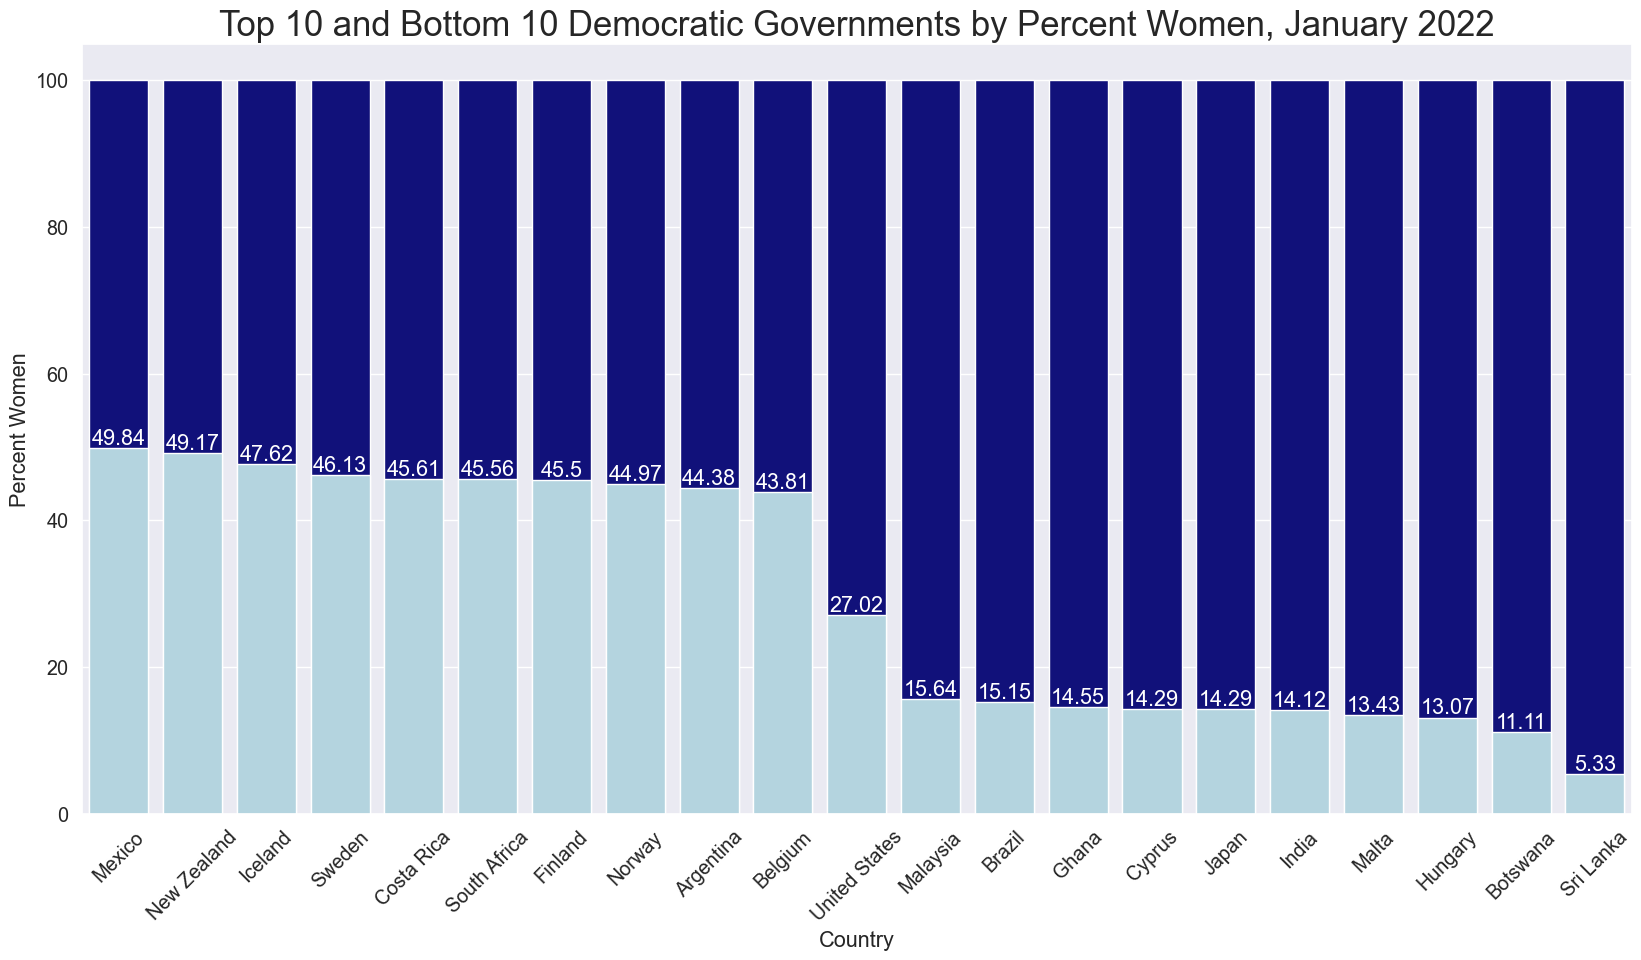

In [121]:
# set the figure size
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.3)

# # from raw value to percentage
women = plot_data.copy()
women['total_seats'] = [round(i / j * 100,2) for i,j in zip(women['totalwomen'], plot_data['totalseats'])]
plot_data['total_seats'] = [i / j * 100 for i,j in zip(plot_data['totalseats'], plot_data['totalseats'])]

bar1 = sns.barplot(x="Country",  y="total_seats", data=plot_data, color='darkblue')

bar2 = sns.barplot(x="Country", y="total_seats", data=women, color='lightblue')

# add legend
# top_bar = mpatches.Patch(color='darkblue', label='Percent Men')
# bottom_bar = mpatches.Patch(color='lightblue', label='Percent Women')
# plt.legend(handles=[top_bar, bottom_bar])

#put value in bar
bar2.bar_label(bar2.containers[1], color='white')


#rotate country labels
bar2.set_xticklabels(
    bar2.get_xticklabels(),
    rotation=45,
)

#add titles
plt.title("Top 10 and Bottom 10 Democratic Governments by Percent Women, January 2022", fontsize=25)
plt.ylabel('Percent Women')

# show the graph
plt.show()

create a new bargraph like this except include all countries and color by their democratic index score

In [125]:
countries_scores = countries[['Country', '2022']]
countries_scores.head()

,Country,2022
0,Canada,8.88
1,United States,7.85
2,Austria,8.20
3,Belgium,7.64
4,Cyprus,7.38


In [141]:
countries_scores.loc[countries_scores['Country'].str.contains('Mal')]

,Country,2022
14,Malta,7.70
87,Malaysia,7.30
150,Malawi,5.91
151,Mali,3.23


In [205]:
#select data for graphing and creating total columns
plot_data2 = jan_22_data[['Country', 'totalseats', 'totalwomen']]

plot_data2 =plot_data2[plot_data2['totalseats'] > 0]
plot_data2['W%'] = plot_data2['totalwomen'] /plot_data2['totalseats']

plot_data2['Country'] = plot_data2['Country'].replace("United States of America", "United States")
plot_data2['Country'] = plot_data2['Country'].replace("Bolivia (Plurinational State of)", "Bolivia")

plot_data2 = plot_data2.merge(countries_scores, on='Country', how='left')
plot_data2 = plot_data2.dropna(subset=["2022"])

plot_data2['Country'] = plot_data2['Country'].replace("United Arab Emirates", "U.A.E.")

full_data = plot_data2.copy()
plot_data2 = plot_data2.sort_values("W%", ascending=False).iloc[np.r_[0:10, 64,-11:-1],:]

plot_data2

,Country,totalseats,totalwomen,W%,2022
0,Rwanda,106,58,0.547170,3.10
1,Cuba,586,313,0.534130,2.65
2,Nicaragua,91,46,0.505495,2.50
4,U.A.E.,40,20,0.500000,2.90
3,Mexico,628,313,0.498408,5.25
5,New Zealand,120,59,0.491667,9.61
10,Bolivia,166,80,0.481928,4.51
6,Iceland,63,30,0.476190,9.52
11,Sweden,349,161,0.461318,9.39
12,Costa Rica,57,26,0.456140,8.29


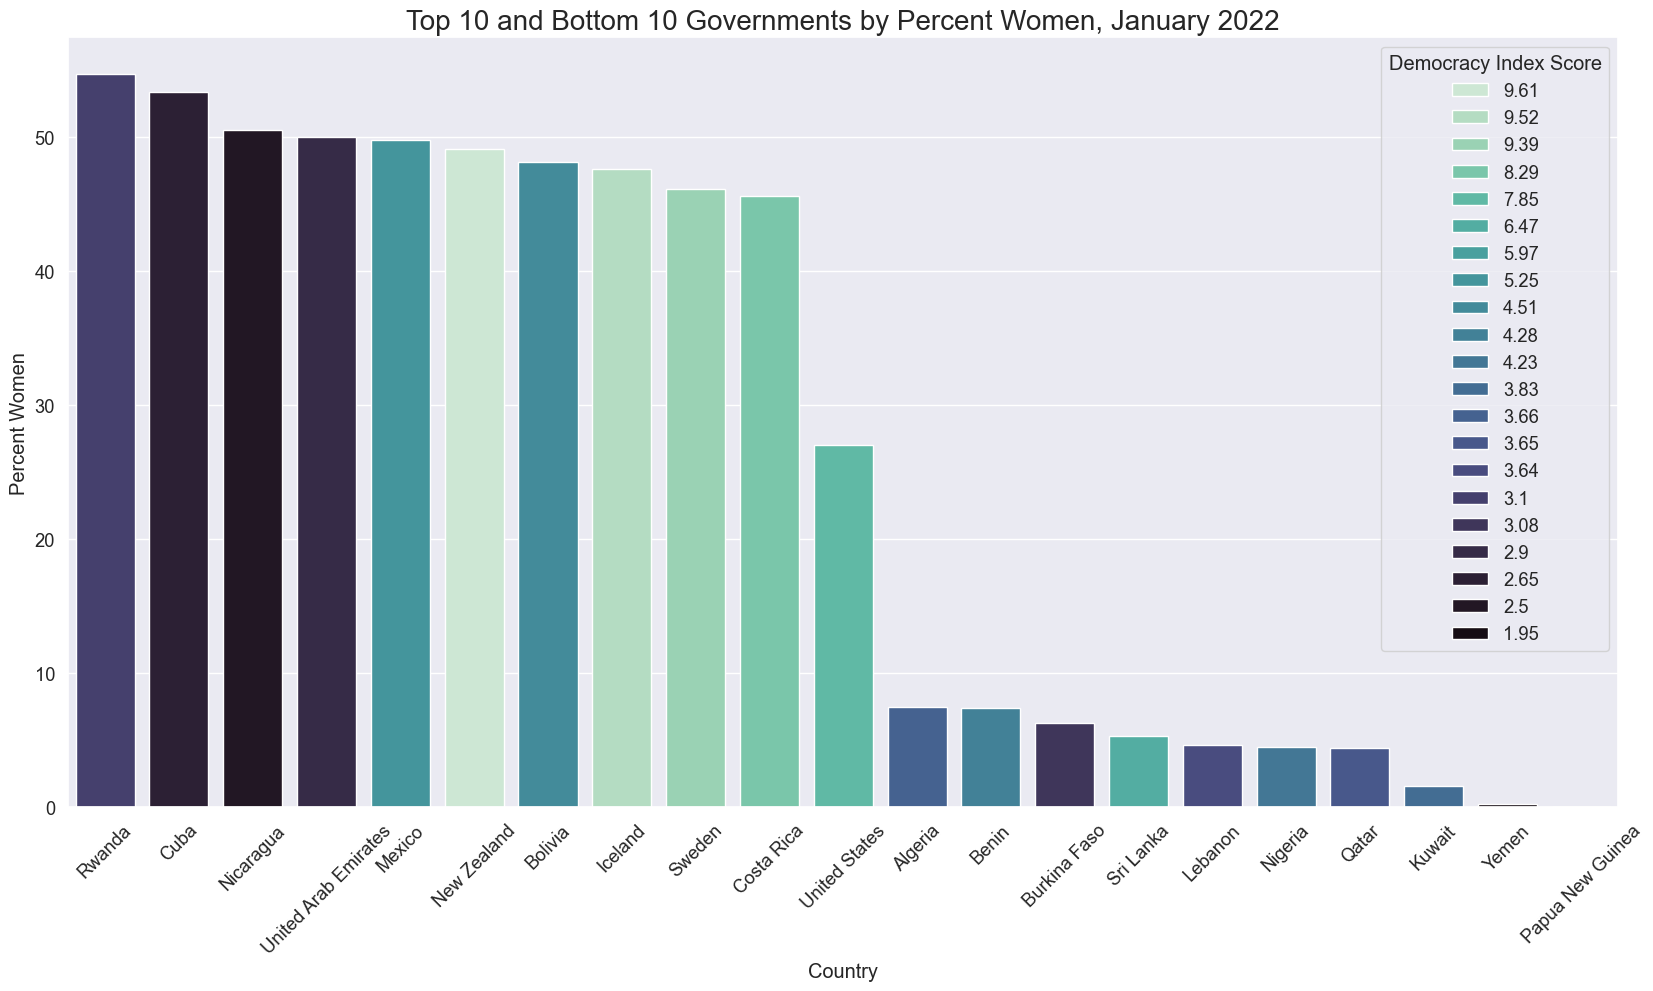

In [195]:
# set the figure size
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.2)

# # from raw value to percentage
women2 = plot_data2.copy()
women2['total_seats'] = [round(i / j * 100,2) for i,j in zip(women2['totalwomen'], plot_data2['totalseats'])]
women2["2022"] = pd.to_numeric(women2["2022"])

bar = sns.barplot(x="Country", y="total_seats", data=women2, hue='2022', dodge=False, palette='mako')

#rotate country labels
bar.set_xticklabels(
    bar.get_xticklabels(),
    rotation=45,
)


#add titles
plt.title("Top 10 and Bottom 10 Governments by Percent Women, January 2022", fontsize=20)
plt.ylabel('Percent Women')

#reverse legend order
handles, labels = bar.get_legend_handles_labels()
bar.legend(handles[::-1], labels[::-1], title='Democracy Index Score', loc='upper right')
#plt.setp(bar.get_legend().get_texts(), fontsize='5')

# show the graph
plt.show()




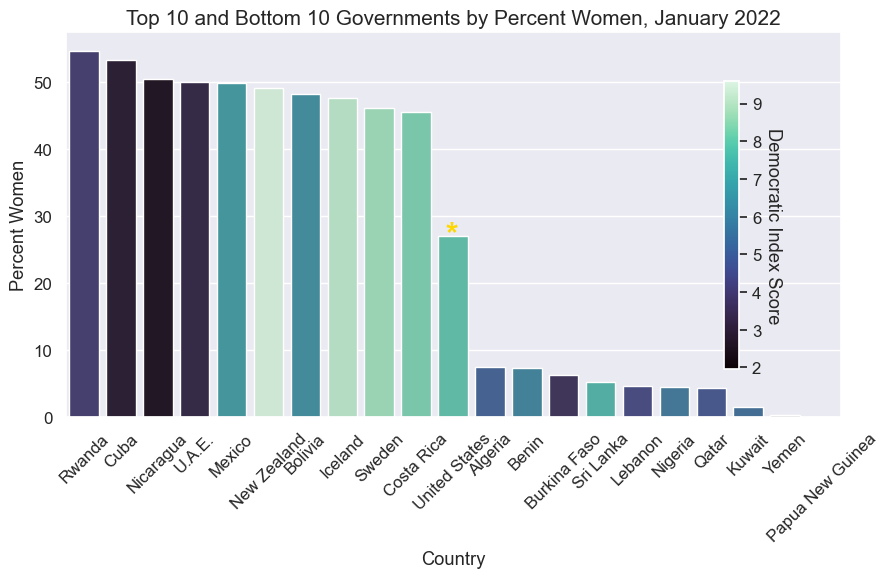

In [215]:
# set the figure size
plt.figure(figsize=(10, 5))
sns.set(font_scale=1.1)

# # from raw value to percentage
women2 = plot_data2.copy()
women2['total_seats'] = [round(i / j * 100,2) for i,j in zip(women2['totalwomen'], plot_data2['totalseats'])]
women2["2022"] = pd.to_numeric(women2["2022"])

#bar = sns.barplot(x="Country", y="total_seats", data=women2, hue='2022', dodge=False, palette='mako')

g = women2.groupby('Country')
rates = g['2022'].mean()
n = g.size()

plot = plt.scatter(n.index, n, c=rates, cmap='mako')
plt.clf()
cbar = plt.colorbar(plot, shrink=0.75)
cbar.ax.get_yaxis().labelpad = 15
cbar.set_label('Democratic Index Score', rotation=270)

#bar = sns.barplot(x=n.index, y=n, hue=rates, palette='Blues', dodge=False)
# bar.set_ylabel('n passengers')
# bar.legend_.remove()
bar = sns.barplot(x="Country", y="total_seats", data=women2, hue='2022', dodge=False, palette='mako')
bar.legend_.remove()

#rotate country labels
bar.set_xticklabels(
    bar.get_xticklabels(),
    rotation=45,
)


#add titles
plt.title("Top 10 and Bottom 10 Governments by Percent Women, January 2022", fontsize=15)
plt.ylabel('Percent Women')


#reverse legend order
# handles, labels = bar.get_legend_handles_labels()
# bar.legend(handles[::-1], labels[::-1], title='Democracy Index Score', loc='upper right')

#emphasize U.S.
plt.text(9.8, 26, "*", horizontalalignment='left', size='xx-large', color='gold', weight='extra bold')

# show the graph
plt.show()




In [175]:
#correlation between democratic index and percent of women in government
full_data.corr()

C:\Users\sruss\AppData\Local\Temp\ipykernel_28624\1656462187.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  full_data.corr()


,totalseats,totalwomen,W%,2022
totalseats,1.000000,0.908689,0.048376,-0.012002
totalwomen,0.908689,1.000000,0.357621,0.085886
W%,0.048376,0.357621,1.000000,0.291363
2022,-0.012002,0.085886,0.291363,1.000000


# Circular barchart attempt

In [219]:
democracies.head()

,Region,2022 rank,Country,Regime type,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2008,2006,five_year_mean
0,North America,12,Canada,Full democracy,8.88,8.87,9.24,9.22,9.15,9.15,9.15,9.08,9.08,9.08,9.08,9.08,9.08,9.07,9.07,9.126
1,North America,30,United States,Flawed democracy,7.85,7.85,7.92,7.96,7.96,7.98,7.98,8.05,8.11,8.11,8.11,8.11,8.18,8.22,8.22,7.934
2,Western Europe,20,Austria,Full democracy,8.20,8.07,8.16,8.29,8.29,8.42,8.41,8.54,8.54,8.48,8.62,8.49,8.49,8.49,8.69,8.246
3,Western Europe,36,Belgium,Flawed democracy,7.64,7.51,7.51,7.64,7.78,7.78,7.77,7.93,7.93,8.05,8.05,8.05,8.05,8.16,8.15,7.644
4,Western Europe,37,Cyprus,Flawed democracy,7.38,7.43,7.56,7.59,7.59,7.59,7.65,7.53,7.40,7.29,7.29,7.29,7.29,7.70,7.60,7.552


In [230]:
circularplotdata.head()

4,Country,totalseats,totalwomen,W%
8,Mexico,628,313,0.498408
10,New Zealand,120,59,0.491667
11,Iceland,63,30,0.476190
13,South Africa,450,205,0.455556
16,Sweden,349,161,0.461318


In [262]:
circulardata = democracies[['Region', 'Country', '2022']].merge(circularplotdata, on='Country', how='inner')
circulardata.head()

,Region,Country,2022,totalseats,totalwomen,W%
0,North America,Canada,8.88,430,148,0.344186
1,North America,United States,7.85,533,144,0.270169
2,Western Europe,Austria,8.20,244,101,0.413934
3,Western Europe,Belgium,7.64,210,92,0.438095
4,Western Europe,Cyprus,7.38,56,8,0.142857


In [265]:
# Reorder the dataframe
circulardata = (
    circulardata
    .groupby(["Region"])
    .apply(lambda x: x.sort_values(["W%"], ascending = False))
    .reset_index(drop=True)
)

In [266]:
set(circulardata.Region)

circulardata.groupby('Region').size()

Region
Asia and Australasia               11
Central and Eastern Europe         13
Latin America and the Caribbean    17
Middle East and North Africa        2
North America                       2
Sub-Saharan Africa                  6
Western Europe                     20
dtype: int64

In [242]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [267]:
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = .25
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

Text(0.5, 1.0, 'Percent of Women in Government by Region, January 2022\n\n\n')

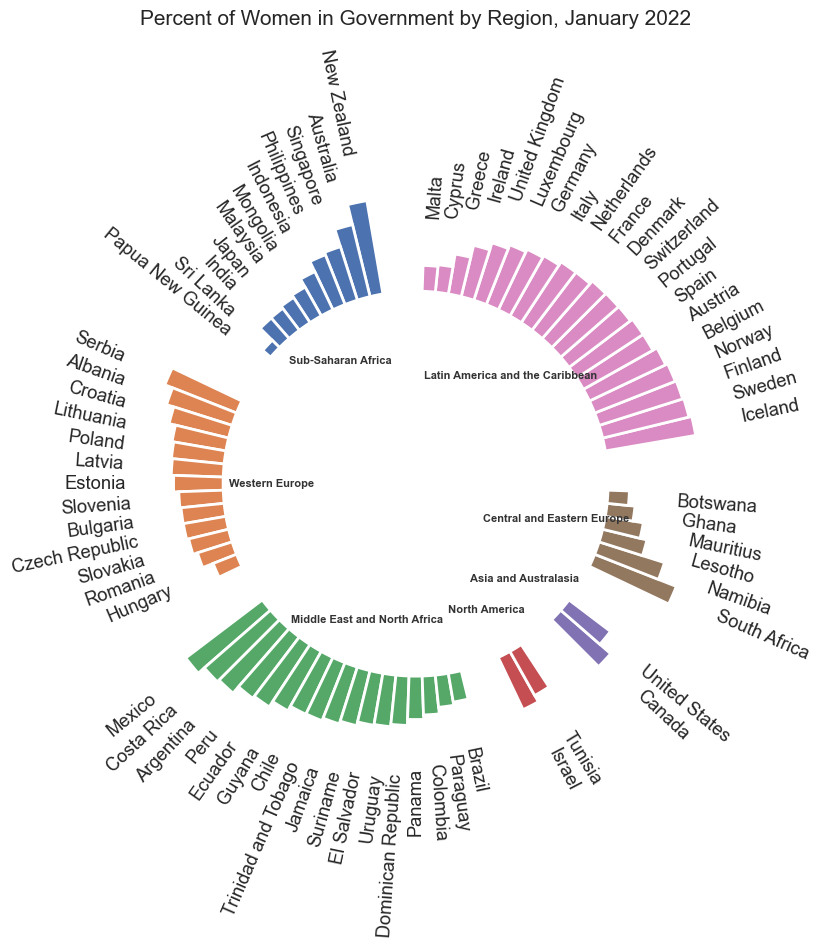

In [274]:
# All this part is like the code above
VALUES = circulardata["W%"].values
LABELS = circulardata["Country"].values
GROUP = circulardata["Region"].values

OFFSET = np.pi / 2

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [11,13,17,2,2,6,20]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-1, 1)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE =[11,13,17,2,2,6,20]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(list(set(circulardata.Region)), GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-1] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -.25, group, color="#333333", fontsize=8, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

plt.title("Percent of Women in Government by Region, January 2022\n\n\n", fontsize=15)

    

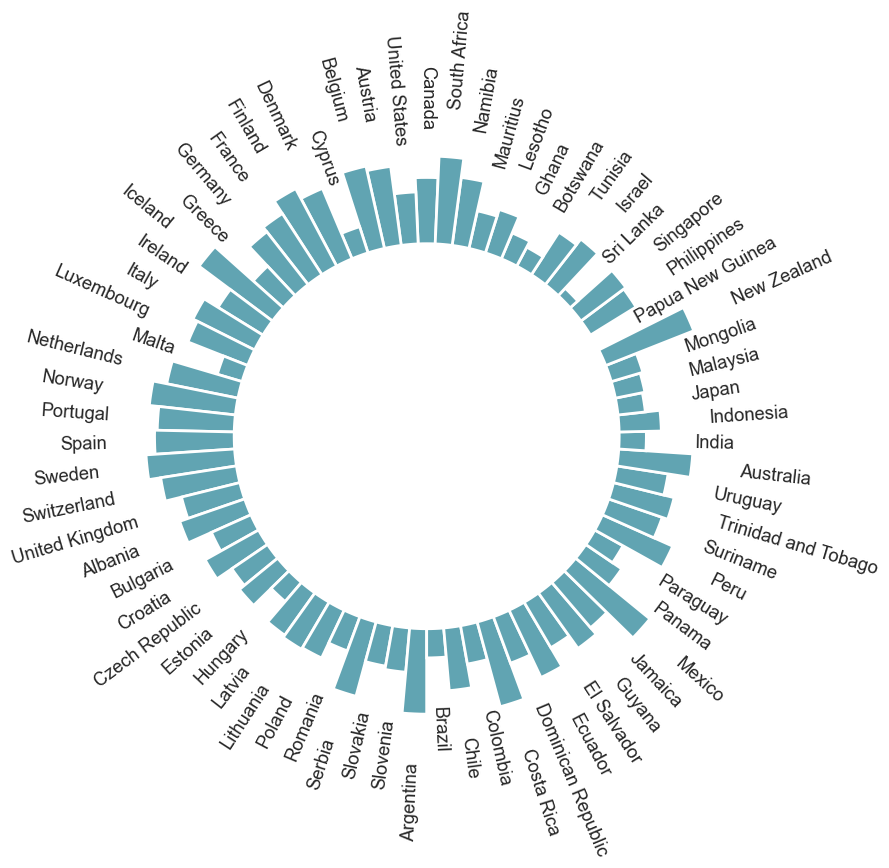

In [253]:
ANGLES = np.linspace(0, 2 * np.pi, len(circulardata), endpoint=False)
VALUES = circulardata["W%"].values
LABELS = circulardata["Country"].values

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-1, 1)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#61a4b2", edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)
